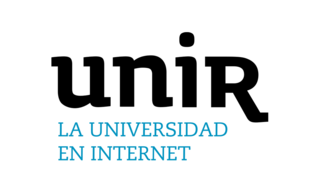
_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Técnicas de agrupamiento

## Objetivos

- Entender los métodos de clustering K-means, jerárquico y DBSCAN.
- Generar agrupamientos con los métodos de clustering previamente indicados y realizar una comparativa.
- Investigar sobre una técnica de agrupamiento con un caso de uso concreto.


## Descripción de la actividad

El conjunto de datos con el cual vamos a trabajar se encuentra en el siguiente enlace: https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data

Este conjunto de datos contiene datos de sensores recopilados de varias máquinas, con el objetivo de predecir fallos de las máquinas con antelación. Incluye una variedad de lecturas de sensores, así como las fallas de la máquina registradas.

### Tareas a realizar
- Clustering
  - Debes completar el código pedido en este notebook y contestar las preguntas finales.
  - Buscar dos artículos científicos (https://scholar.google.es/) con un caso de uso de técnicas de agrupamiento. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para cada artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la detección de anomalías.
    - Técnicas de detección de anomalías empleadas.
    - Principales resultados de la aplicación y de la investigación.


#### Nombre del estudiante

In [8]:
# Fredy Darío Cerna Calderón

### Clustering

Comenzamos importando las librerías necesarias y cargando el dataset.

Este archivo contiene 944 mediciones de sensores de diferentes máquinas, contiene una etiqueta de si tiene fallo o no.

Notas:
1. footfall: The number of people or objects passing by the machine.
2. tempMode: The temperature mode or setting of the machine.
3. AQ: Air quality index near the machine.
4. USS: Ultrasonic sensor data, indicating proximity measurements.
5. CS: Current sensor readings, indicating the electrical current usage of the machine.
6. VOC: Volatile organic compounds level detected near the machine.
7. RP: Rotational position or RPM (revolutions per minute) of the machine parts.
8. IP: Input pressure to the machine.
9. Temperature: The operating temperature of the machine.
10. fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# se carga el dataset, con separados 
df = pd.read_csv('data.csv', sep=',') 

# Vista general
print("Primeras filas:")
print(df.head())

print("\nInformación general:")
print(df.info())

print("\nEstadísticas:")
print(df.describe())


Primeras filas:
   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail      

#### ¿Cuántas instancias tiene el dataset?

In [10]:
##indica aquí tu respuesta
print("\n Numero de Instancias:")
print(df.shape[0])



 Numero de Instancias:
944


#### ¿Cuál es el tipo de datos predominante en el dataset?

In [11]:
##_indica aquí tu respuesta_
df.dtypes.value_counts()

int64    10
Name: count, dtype: int64

#### ¿Son variables continuas o categóricas?

La mayoría de las variables son continuas o discretas numéricas. Solo la variable fail es categórica binaria (0 = sin fallo, 1 = fallo)

#### ¿cuáles son los valores mínimo y máximo de la variable 'RP'?

In [12]:
print(df['RP'].min(), df['RP'].max())


19 91


Mínimo 19 y Máximo 91

#### Para los algoritmos de clustering el dataset no puede tener instancias con datos faltantes. ¿Tiene este dataset datos faltantes?

In [13]:
df.isnull().sum().sum()

np.int64(0)

No tiene datos faltantes.

#### Elimine la variable fail

In [14]:
df = df.drop(columns=['fail'])

#### ¿Es necesario hacer algún tratamiendo adicional sobre los datos?

Sí, es necesario escalar los datos numéricos para que los algoritmos de clustering funcionen correctamente.

In [15]:
### PON AQUÍ TU CÓDIGO EN CASO DE QUE SEA NECESARIO HACER ALGÚN TRATAMIENTO ADICIONAL
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

## K-Means

Crea 10 modelos de KMeans y entrénalos. Haciendo uso del método indicado para saber el número ideal de clústeres.

In [16]:
#  Entrenamiento de modelos y cálculo de métricas
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))


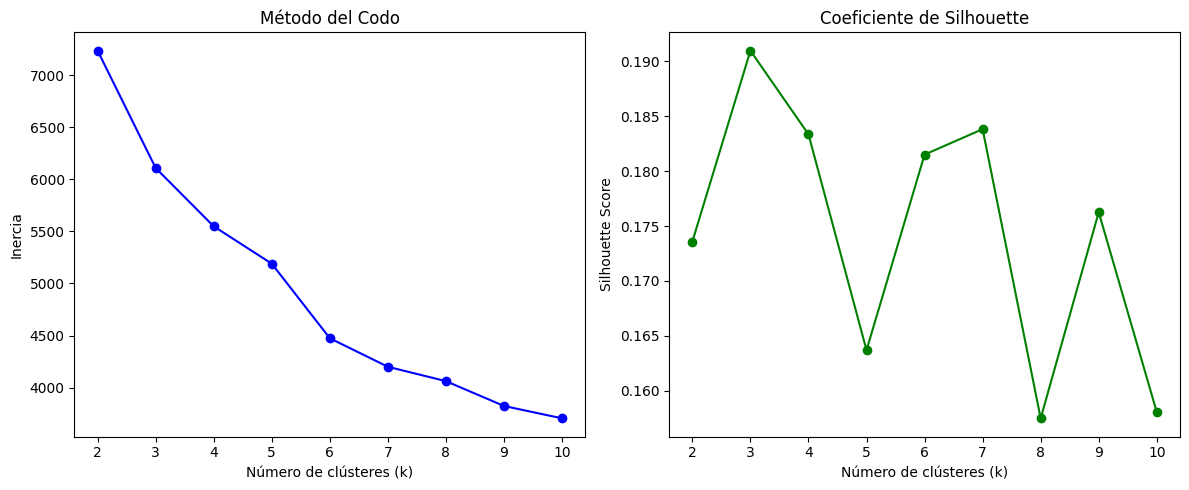

In [17]:
# Gráficos del método del codo y silhouette
plt.figure(figsize=(12, 5))

# Elbow method
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bo-')
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo")

# Silhouette score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'go-')
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Silhouette Score")
plt.title("Coeficiente de Silhouette")

plt.tight_layout()
plt.show()

Método del codo: En la gráfica de la izquierda (inercia), se observa que la caída significativa se suaviza a partir de k = 3 o k = 4, lo que sugiere que esos valores podrían ser apropiados.

Coeficiente de Silhouette: El valor más alto del coeficiente de Silhouette se da en k = 3 (aprox. 0.191). Refuerza la elección de k = 3 como la mejor opción.

In [18]:
kmeansmodel = KMeans(n_clusters=3, random_state=42)
kmeansmodel.fit(X)

KMeans(n_clusters=3, random_state=42)

Ahora toca interpretar lo que Kmeans ha realizado. Recordemos que el objetivo de KMeans es encontrar patrones en los datos.

Lo primero que vamos a realizar es un gráfico para visualizar los clústers que ha creado con base en las variables utilizadas para crearlos.

In [19]:
import plotly.express as px

clusters = pd.DataFrame(X,columns=df.columns)
clusters['label'] = kmeansmodel.labels_
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=600)
fig4.show()

Se visualizan bien los 3 clústeres, y muestra que:

Cada grupo tiene un patrón distinto de valores promedio por variable.

El clúster 2 (verde) tiene valores altos en USS y RP.

El clúster 0 (rojo) destaca en VOC y AQ.

El clúster 1 (azul) está más balanceado, pero más alto en IP y Temperature.

## DBSCAN

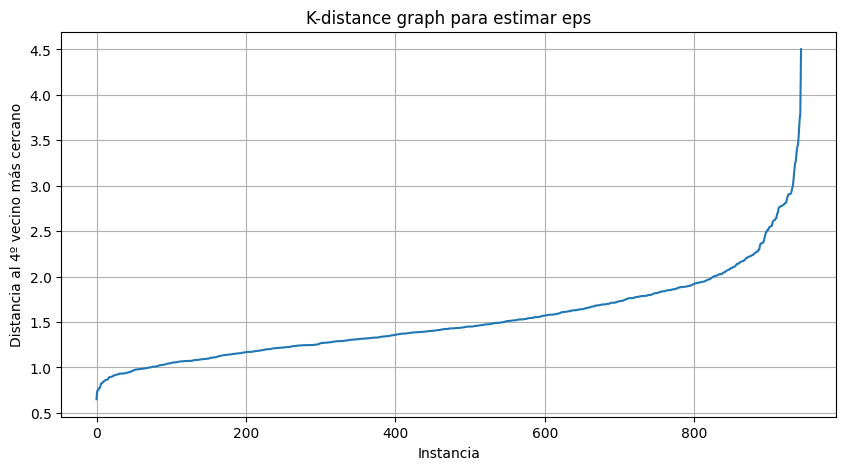

In [20]:
#### Realiza una búsqueda de los mejores hiperparámetros para el algoritmo
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, 4], axis=0)  # 4 = n_neighbors - 1
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title("K-distance graph para estimar eps")
plt.xlabel("Instancia")
plt.ylabel("Distancia al 4º vecino más cercano")
plt.grid(True)
plt.show()


El "codo" ocurre alrededor de eps ≈ 1.7.

Esto sugiere que un valor razonable para eps es entre 1.6 y 1.8.

In [22]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.7, min_samples=5)

In [23]:
#### Entrenar el algoritmo DBSCAN con los hiperparámetros encontrados
dbscan_labels = dbscan.fit_predict(X)

In [26]:
# Pon aquí tu código


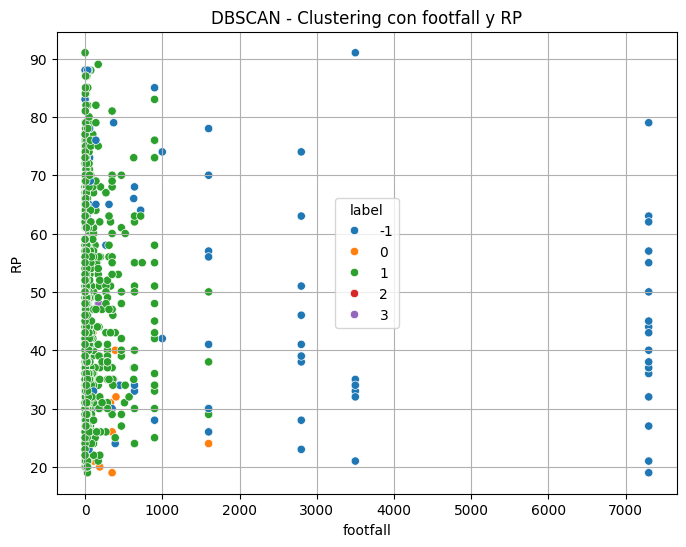

In [27]:
#### Elegir dos variables para visualizar los clústeres
df_plot = df.copy()
df_plot['label'] = dbscan_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x="footfall", y="RP", hue="label", palette="tab10")
plt.title("DBSCAN - Clustering con footfall y RP")
plt.xlabel("footfall")
plt.ylabel("RP")
plt.grid(True)
plt.show()

Outliers: Las instancias etiquetadas con -1 son puntos considerados anómalos o ruido. En la gráfica, hay bastantes.

Clústeres: Se identifican varios (hasta label = 3), aunque muchos puntos siguen agrupados en un clúster grande (label = 1).

In [28]:
# Pon aquí tu código
import numpy as np
import collections

# Conteo de etiquetas
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clústeres encontrados (excluyendo ruido): {n_clusters}")
print(f"Número de instancias marcadas como outliers: {n_noise}")
print("Distribución de puntos por clúster:")
print(collections.Counter(labels))

Número de clústeres encontrados (excluyendo ruido): 4
Número de instancias marcadas como outliers: 140
Distribución de puntos por clúster:
Counter({np.int64(1): 773, np.int64(-1): 140, np.int64(0): 22, np.int64(3): 5, np.int64(2): 4})


## Dendrograma 

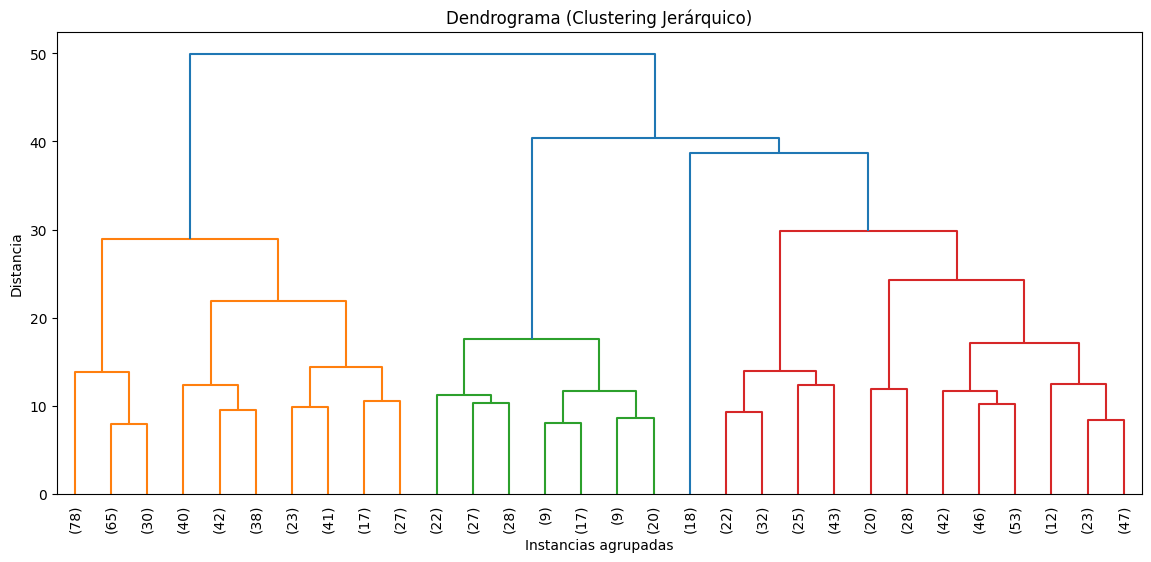

In [29]:
#### Aplica el algoritmo de AgglomerativeClustering a los datos
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(14, 6))
linked = linkage(X, method='ward')

dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title("Dendrograma (Clustering Jerárquico)")
plt.xlabel("Instancias agrupadas")
plt.ylabel("Distancia")
plt.show()

Según el dendrograma, el número ideal de clústeres es **3**, ya que al cortar a una altura de ~40 se forman 3 grupos principales bien diferenciados.

In [30]:
## Pon aquí tu código
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X)

df_hierarchical = df.copy()
df_hierarchical["label"] = agglo_labels

#### Realiza un análisis de cuál es el número ideal de clústeres y explique el porqué de su elección

Tras analizar el dendrograma generado por el algoritmo de Clustering Jerárquico (Agglomerative), se observa que existe una división natural del conjunto de datos al cortar a una altura aproximada de 40 en el gráfico. Esta división forma **tres grupos principales**, que están claramente separados del resto, lo que sugiere que el valor óptimo de clústeres es **3**.

Esta elección también coincide con los resultados obtenidos previamente con el algoritmo K-Means, donde tanto el método del codo como el coeficiente de Silhouette señalaron que 3 era una buena elección.

Por tanto, el número ideal de clústeres para este conjunto de datos es **3**, ya que proporciona una segmentación significativa, coherente entre métodos, y con una distancia razonable entre grupos.


Indica tu respuesta

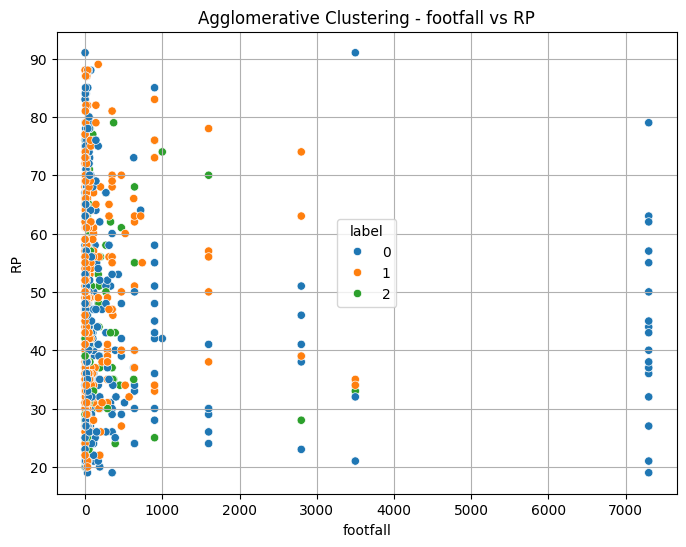

In [31]:
#### Aplica de nuevo el clustering jerárquico con el número de clústeres elegido y crea un dataframe con los datos y las etiquetas otorgadas por el algoritmo.

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_hierarchical, x="footfall", y="RP", hue="label", palette="tab10")
plt.title("Agglomerative Clustering - footfall vs RP")
plt.grid(True)
plt.show()

## Análisis

#### Realiza un análisis detallado de cada uno de los grupos generados por los algoritmos aplicados anteriormente y decide cuál es el mejor método para el conjunto de datos. 
Utiliza gráficos o tablas para apoyar tus conclusiones

## Análisis comparativo de los métodos de clustering

Se han aplicado tres algoritmos de agrupamiento: **K-Means**, **DBSCAN** y **Clustering Jerárquico (Agglomerative)**. A continuación se analiza su comportamiento y resultados:

- **K-Means (k=3):**
  - Generó tres clústeres bien diferenciados.
  - Fue eficiente y proporcionó una separación clara basada en patrones globales.
  - El método del codo y el coeficiente de Silhouette confirmaron que k=3 era una elección adecuada.
  - Limitación: no detecta outliers y requiere definir `k` previamente.

- **DBSCAN (eps=1.7, min_samples=5):**
  - Detectó 4 clústeres y **140 outliers** (≈14.8% del total).
  - Muy útil para encontrar ruido o valores atípicos que los otros algoritmos no pueden detectar.
  - Identificó un clúster denso principal y varios más pequeños.
  - Limitación: es sensible a la escala de los datos y a la elección de hiperparámetros.

- **Clustering jerárquico (Agglomerative):**
  - Utilizando el dendrograma se identificaron 3 grupos naturales.
  - Produce una representación visual útil para explorar relaciones entre clústeres.
  - Los resultados fueron consistentes con K-Means.
  - Limitación: menos eficiente con datasets muy grandes.

### Conclusión:

Todos los algoritmos ofrecieron resultados coherentes, pero **K-Means fue el más equilibrado** en cuanto a claridad, rapidez y simplicidad de interpretación. **DBSCAN** destacó por su capacidad para detectar anomalías, y el **clustering jerárquico** ayudó a validar visualmente el número ideal de clústeres. Por tanto, **K-Means con k=3** se considera el método más adecuado para este conjunto de datos.


### Comparativa de los métodos aplicados

| Algoritmo             | N.º de Clústeres | Detecta Outliers | Visualización utilizada      | Ventajas clave                                 |
|-----------------------|------------------|------------------|------------------------------|------------------------------------------------|
| **K-Means**           | 3                | No             | Gráfico polar + Elbow chart  | Rápido, fácil de interpretar, buena separación |
| **DBSCAN**            | 4 + 140 outliers | Sí             | Scatterplot + K-distance     | Detecta ruido, no requiere k                   |
| **Jerárquico (Agglo)**| 3                | No             | Dendrograma + Scatterplot    | Visualiza jerarquías, valida la elección de k |



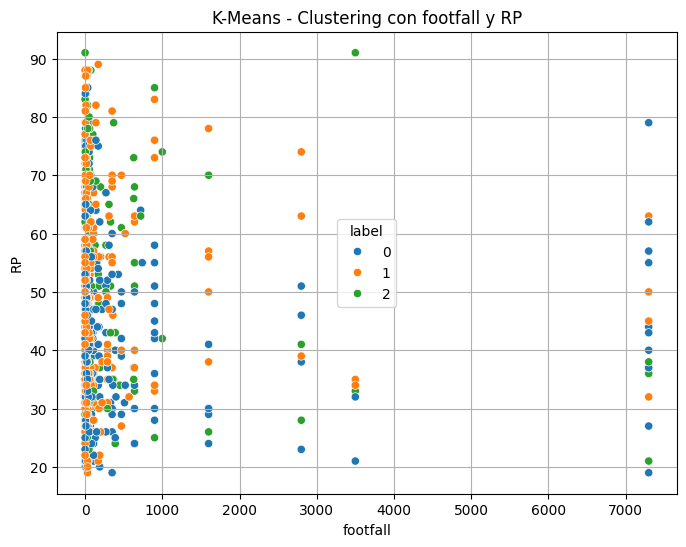

In [32]:
# KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df_kmeans = df.copy()
df_kmeans["label"] = kmeansmodel.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_kmeans, x="footfall", y="RP", hue="label", palette="tab10")
plt.title("K-Means - Clustering con footfall y RP")
plt.xlabel("footfall")
plt.ylabel("RP")
plt.grid(True)
plt.show()

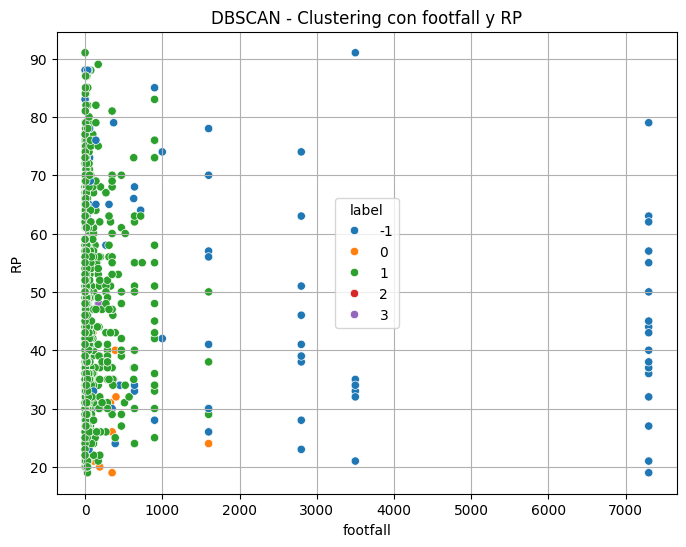

In [33]:
#DBSCAN
df_dbscan = df.copy()
df_dbscan["label"] = dbscan_labels  # Asegúrate de que esta variable ya existe

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_dbscan, x="footfall", y="RP", hue="label", palette="tab10")
plt.title("DBSCAN - Clustering con footfall y RP")
plt.xlabel("footfall")
plt.ylabel("RP")
plt.grid(True)
plt.show()


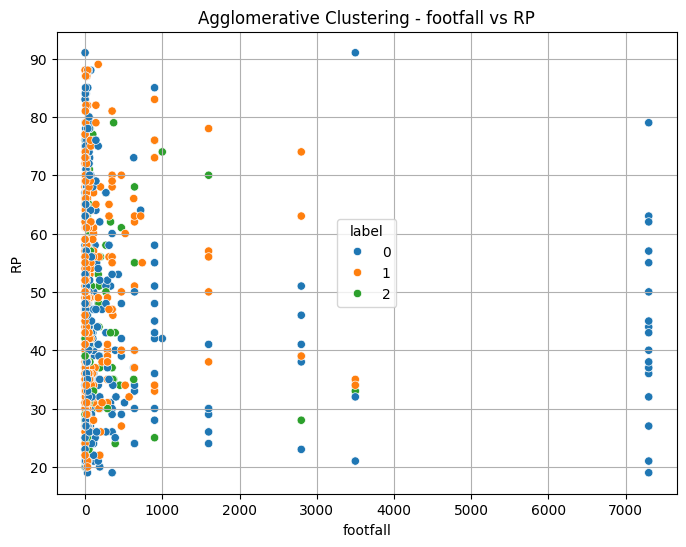

In [34]:
# Agglomerative Clustering
df_agglo = df.copy()
df_agglo["label"] = agglo_labels  

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_agglo, x="footfall", y="RP", hue="label", palette="tab10")
plt.title("Agglomerative Clustering - footfall vs RP")
plt.xlabel("footfall")
plt.ylabel("RP")
plt.grid(True)
plt.show()


## Artículos de investigación

#### Artículo 1

- **Título:** *Unsupervised clustering for sepsis identification in large-scale patient data: a model development and validation study*
- **Autores:** Na Li, Kiarash Riazi, Jie Pan, Kednapa Thavorn, Jennifer Ziegler, Bram Rochwerg, Hude Quan, Hallie C. Prescott, Peter M. Dodek, Bing Li, Alain Gervais, Allan Garland
- **Publicado en:** *Intensive Care Medicine Experimental*, volumen 13, artículo 37 (2025)
- **Enlace:** [https://icm-experimental.springeropen.com/articles/10.1186/s40635-025-00744-w](https://icm-experimental.springeropen.com/articles/10.1186/s40635-025-00744-w)

**Objetivo:** Proponer un enfoque novedoso para la identificación de sepsis mediante clustering no supervisado, utilizando grandes volúmenes de datos hospitalarios de pacientes en cuidados intensivos, sin depender de etiquetas previas o definiciones clínicas fijas.

**Técnicas de detección de anomalías empleadas:**  
Se aplicaron ocho algoritmos de clustering no supervisado, incluyendo K-Means, Mini-Batch K-Means, Gaussian Mixture Models, CLARA, Self-Organizing Maps (SOM), y el algoritmo que obtuvo mejores resultados: **Robust and Sparse K-means Clustering (RSKC)**. Se usaron métricas como Silhouette Score, Davies-Bouldin Index y Calinski-Harabasz Index, además de análisis de estabilidad y validación cruzada con XGBoost.

**Principales resultados:**  
- Se identificaron 48 clústeres clínicamente significativos, de los cuales 11 contenían la mayoría de pacientes con sepsis según el criterio ASE (Adult Sepsis Event).
- El algoritmo RSKC logró separar pacientes con distintos perfiles clínicos sin necesidad de etiquetas predefinidas.
- La validación externa mostró alta consistencia entre cohortes.
- Muchos pacientes inicialmente clasificados como "no sepsis" bajo los criterios ASE podrían cumplir criterios más liberales si se consideraran otras métricas clínicas.

Este trabajo demuestra que el clustering no supervisado puede capturar patrones clínicos complejos, revelando subtipos de sepsis útiles para la vigilancia epidemiológica y el diseño de intervenciones personalizadas.



#### Artículo 2

- **Título:** *Identifying Landslide Hotspots Using Unsupervised Clustering: A Case Study*
- **Autores:** Ikechukwu Daniel, Lateef Adesola Akinyemi, Obianuju Udekwu
- **Publicado en:** *Journal of Future Artificial Intelligence and Technologies*, Vol. 1, No. 3, diciembre de 2024
- **Enlace:** [https://faith.futuretechsci.org/index.php/FAITH/article/view/37](https://faith.futuretechsci.org/index.php/FAITH/article/view/37)

**Objetivo:** Detectar zonas geográficas propensas a deslizamientos utilizando algoritmos de clustering no supervisado aplicados a datos topográficos, como pendiente, elevación y curvatura.

**Técnicas de detección de anomalías empleadas:** Se aplicaron K-Means, DBSCAN, Clustering jerárquico, Spectral Clustering y Mean Shift Clustering. Se utilizaron métricas como Silhouette Score, Davies-Bouldin Index y Calinski-Harabasz Index para comparar resultados.

**Principales resultados:** 
- **Mean Shift Clustering** logró el mejor rendimiento general, con el mayor Calinski-Harabasz Index (4121.75) y el mejor Davies-Bouldin Index (0.603).
- **DBSCAN** identificó correctamente 12 puntos de ruido y logró un Silhouette Score de 0.610.
- El estudio demostró que el clustering no supervisado permite clasificar eventos de deslizamiento de manera más objetiva que los métodos tradicionales, y puede mejorar la planificación de sistemas de alerta temprana y mitigación del riesgo.

